In [1]:
import normalization as nrm
import pandas as pd

In [2]:
#import imaging data
roi_df = pd.read_csv("C:/Users/mclaughlin.aj/Documents/AM_ANALYSIS/CellProfiler_190212/BM_AM_180808_190312_Results.csv")
roi_df.head(5)

,image,ind cell index,total cell index,Area,Circ.,AR,Round,Solidity,Pax6_mean,Islet1_mean,...,SCGN_median,Kv2.2_median,DAPI3_median,CAVIII_median,Rec_median,DAPI4_median,Calb_median,PKC_median,Parv_median,DAPI5_median
0,21_s1m1,0,0,0.047,0.458,1.551,0.645,0.795,1093.606,1237.738,...,545,2559,432,2216,14732,363,1005,911,554,383
1,21_s1m1,1,1,0.032,0.868,1.462,0.684,0.916,389.737,1787.737,...,505,2325,1421,2063,3089,566,625,901,485,2563
2,21_s1m1,2,2,0.037,0.871,1.156,0.865,0.912,436.575,1095.472,...,1934,2564,2181,2039,2349,578,618,664,304,3695
3,21_s1m1,3,3,0.044,0.709,1.674,0.597,0.879,576.280,1651.413,...,348,2414,3377,1760,1433,799,676,729,247,6672
4,21_s1m1,4,4,0.037,0.658,1.233,0.811,0.787,462.293,1785.806,...,435,2516,1796,1804,1312,432,618,745,275,2477


In [ ]:
#Look at 
nrm.meanSTD(norm_roi_df1, ["Pax6", "DAPI.2", "CAVIII", "Parv", "CABP5"])

Passed  image 
Normalizing   ind cell index
Normalizing   total cell index
Normalizing   Area
Normalizing   Circ.
Normalizing   AR
Normalizing   Round
Normalizing   Solidity
Normalizing   Pax6_mean
Normalizing   Islet1_mean
Normalizing   TARPg3_mean
Normalizing   DAPI_mean
Normalizing   CD15_mean
Normalizing   GLT-1_mean
Normalizing   Cav3.1_mean
Normalizing   DAPI2_mean
Normalizing   CABP5_mean
Normalizing   SSCGN_mean
Normalizing   Kv2.2_mean
Normalizing   DAPI3_mean
Normalizing   CAVIII_mean
Normalizing   Rec_mean
Normalizing   DAPI4_mean
Normalizing   Calb_mean
Normalizing   PKC_mean
Normalizing   Parv_mean
Normalizing   DAPI5_mean
Normalizing   Pax6_stddev
Normalizing   Islet1_stddev
Normalizing   Tarpg3_stddev
Normalizing   DAPI_stddev
Normalizing   CD15_stddev
Normalizing   GLT-1_stddev
Normalizing   Cav3.1_stddev
Normalizing   DAPI2_stddev
Normalizing   CABP5_stddev
Normalizing   SCGN_stddev
Normalizing   Kv2.2_stddev
Normalizing   DAPI3_stddev
Normalizing   CAVIII_stddev
Norma

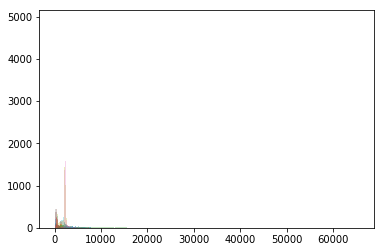

In [4]:
#1. normalizes DAPI with the normalize fn of cutoff=0.01 (1% of the mass on left and 1% of mass on right).
#2. removes all rows where the normalized DAPI is less than or equal to 0.2. 
#3. normalizes and z normalizes the rest of the columns, named norm and z norm (except unwantedCols).
norm_roi_df = nrm.normalizeProcedure(roi_df, unwantedCols=['image', 'ind cell index', 'total cell index'], quiet=False)

In [5]:
norm_roi_df.head(5)

,image,ind cell index,total cell index,Area,Circ.,AR,Round,Solidity,Pax6_mean,Islet1_mean,...,z norm SCGN_median,z norm Kv2.2_median,z norm DAPI3_median,z norm CAVIII_median,z norm Rec_median,z norm DAPI4_median,z norm Calb_median,z norm PKC_median,z norm Parv_median,z norm DAPI5_median
2,21_s1m1,2,2,0.037,0.871,1.156,0.865,0.912,436.575,1095.472,...,1.952125,0.738977,-0.639472,-0.077418,0.611321,-1.133428,-1.132969,-0.964437,-0.503498,0.519652
3,21_s1m1,3,3,0.044,0.709,1.674,0.597,0.879,576.280,1651.413,...,-0.474142,0.432387,-0.077741,-0.329253,-0.344920,-0.976913,-1.027771,-0.917280,-0.542640,2.515583
5,21_s1m1,5,5,0.043,0.760,1.409,0.710,0.879,499.093,1740.056,...,-0.253850,0.436475,-0.487297,0.037217,1.868214,-1.079604,-1.045909,-0.925986,-0.537147,1.582316
6,21_s1m1,6,6,0.062,0.788,1.425,0.702,0.897,604.570,1057.447,...,-0.403771,0.391508,-0.604716,-0.100886,0.749120,-1.116431,-1.091253,-0.868673,-0.467788,0.529708
7,21_s1m1,7,7,0.038,0.826,1.463,0.683,0.898,412.611,2886.318,...,-0.423658,0.256608,-0.550234,-0.058462,2.532155,-1.092352,-1.016889,-0.813536,-0.507618,1.097580


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023613A45940>,
      dtype=object)

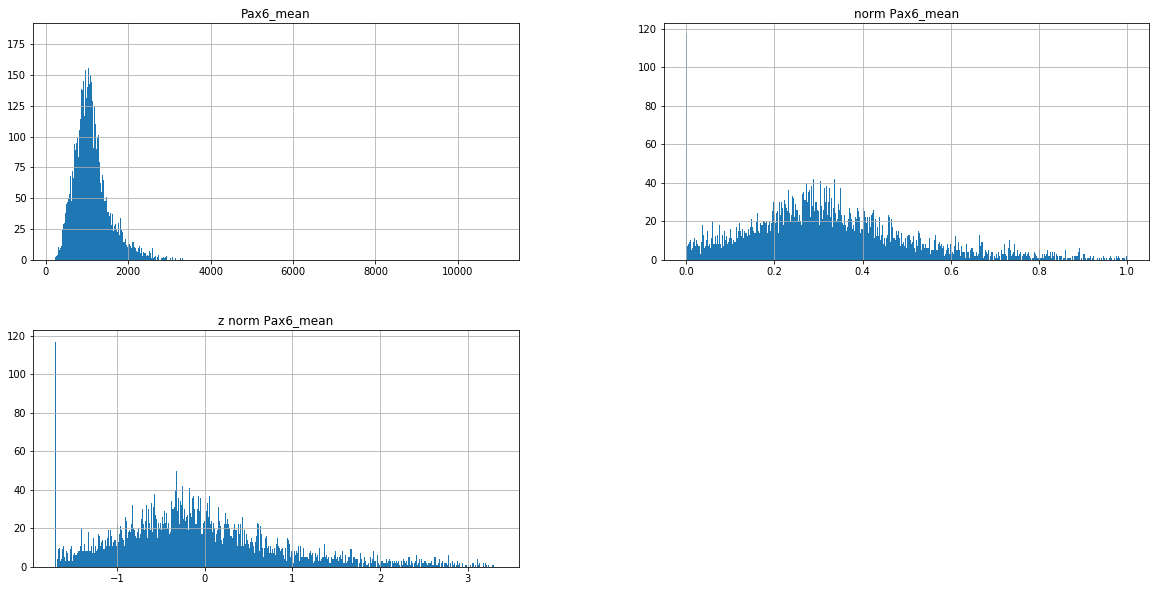

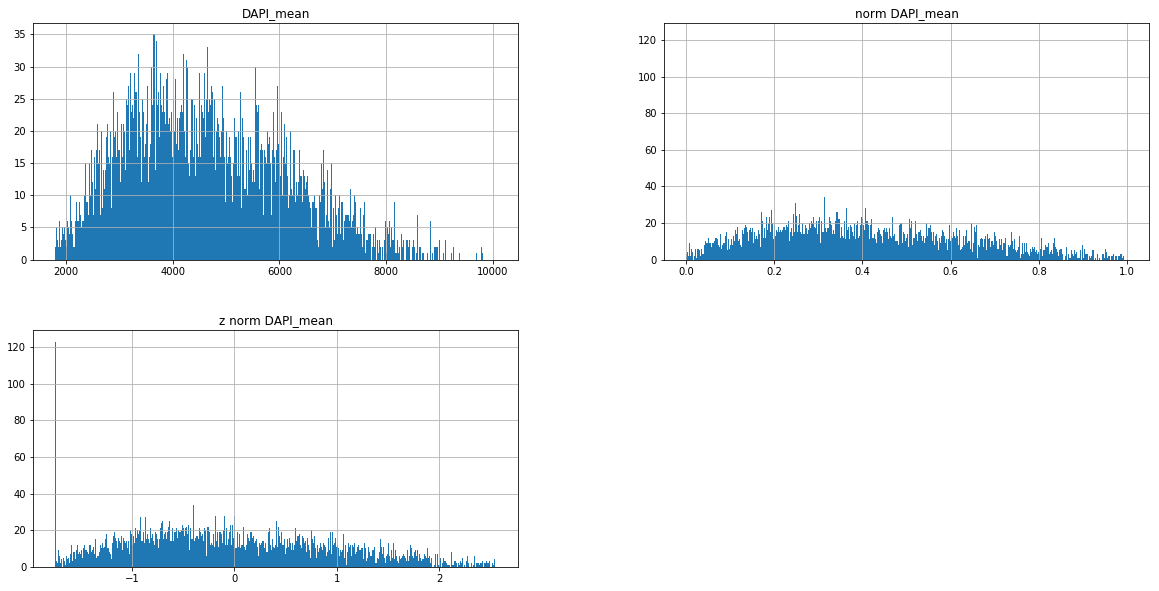

In [6]:
#Preview normalization steps
nrm.normHists(norm_roi_df, "Pax6_mean")
nrm.normHists(norm_roi_df, "DAPI_mean")